In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data_raw.xlsx')
df.head()

,Account,ATMID,caldate,Dispense,DT,MaxCapacity,CountTotalTxn
0,ABC,SPCN02020,2021-01-01,564500,0,2640000,157
1,ABC,TPCN10269,2021-01-01,509000,9,3520000,92
2,ABC,APCN00816,2021-01-01,64800,0,2640000,36
3,PQR,S1CN1142,2021-01-01,834500,0,3520000,101
4,PQR,S1CN2022,2021-01-01,825700,0,2860000,364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Account        14593 non-null  object        
 1   ATMID          14593 non-null  object        
 2   caldate        14593 non-null  datetime64[ns]
 3   Dispense       14593 non-null  int64         
 4   DT             14593 non-null  int64         
 5   MaxCapacity    14593 non-null  int64         
 6   CountTotalTxn  14593 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 798.2+ KB


In [4]:
df.describe()

,Dispense,DT,MaxCapacity,CountTotalTxn
count,1.459300e+04,14593.000000,1.459300e+04,14593.000000
mean,4.027993e+05,158.538614,3.279753e+06,105.322963
std,3.036762e+05,356.073765,3.974770e+05,76.727151
min,0.000000e+00,0.000000,2.420000e+06,0.000000
25%,1.685000e+05,0.000000,2.860000e+06,45.000000
50%,3.653000e+05,0.000000,3.520000e+06,98.000000
75%,5.780000e+05,64.000000,3.520000e+06,146.000000
max,2.151800e+06,1440.000000,3.740000e+06,561.000000


In [11]:
df['dayname'] = df['caldate'].dt.day_name()
df['day'] = df['caldate'].dt.day
df['month'] = df['caldate'].dt.month
df['week'] = df['caldate'].dt.isocalendar().week
df['year'] = df['caldate'].dt.isocalendar().year
df['year'] = df['year'].astype(str)
df['week'] = df['week'].astype(str)
df['unique_week'] = df['year'] + '_' + df['week']
df['year'] = df['year'].astype(int)
df['week'] = df['week'].astype(int)
df = df[df['year'] != 2020]
df.head()

,Account,ATMID,caldate,Dispense,DT,MaxCapacity,CountTotalTxn,dayname,day,month,week,year,unique_week
42,ABC,SPCN02020,2021-01-04,164600,168,2640000,65,Monday,4,1,1,2021,2021_1
43,ABC,TPCN10269,2021-01-04,781500,0,3520000,143,Monday,4,1,1,2021,2021_1
44,ABC,APCN00816,2021-01-04,63400,0,2640000,30,Monday,4,1,1,2021,2021_1
45,PQR,S1CN1142,2021-01-04,223500,0,3520000,37,Monday,4,1,1,2021,2021_1
46,PQR,S1CN2022,2021-01-04,1413500,17,2860000,374,Monday,4,1,1,2021,2021_1


In [13]:
# plt.figure(figsize=(15, 4))
# plt.plot(df.caldate, df.Dispense)
# plt.title('Medicos Orders')
# plt.legend(loc='best')
# plt.show(block=False)

In [6]:
max_capacity = df.loc[:, ['MaxCapacity', 'ATMID', 'Account']].drop_duplicates()
max_capacity.reset_index(inplace=True, drop=True)
max_capacity

,MaxCapacity,ATMID,Account
0,2640000,SPCN02020,ABC
1,3520000,TPCN10269,ABC
2,2640000,APCN00816,ABC
3,3520000,S1CN1142,PQR
4,2860000,S1CN2022,PQR
5,3520000,SPCND067,PQR
6,3520000,APAN11109,ABC
7,3740000,APAN23217,ABC
8,3520000,SPCNG376,PQR
9,3520000,S1CN3514,PQR


,ATMID,unique_week,year,week,Dispense,DT,CountTotalTxn,MaxCapacity,Account,utilization
0,APAN11109,2021_1,2021,1,1767500,6229,545,3520000,ABC,0.502131
11,APAN11109,2021_2,2021,2,3373500,2459,930,3520000,ABC,0.958381
22,APAN11109,2021_3,2021,3,1423000,6117,376,3520000,ABC,0.404261
33,APAN11109,2021_4,2021,4,1774000,1873,551,3520000,ABC,0.503977
44,APAN11109,2021_5,2021,5,2913500,1554,791,3520000,ABC,0.827699
48,APAN11109,2021_6,2021,6,4094500,3152,1004,3520000,ABC,1.163210
49,APAN11109,2021_7,2021,7,3097500,2471,934,3520000,ABC,0.879972
50,APAN11109,2021_8,2021,8,1650000,2632,473,3520000,ABC,0.468750
51,APAN11109,2021_9,2021,9,2253500,3600,613,3520000,ABC,0.640199
1,APAN11109,2021_10,2021,10,993500,7914,327,3520000,ABC,0.282244


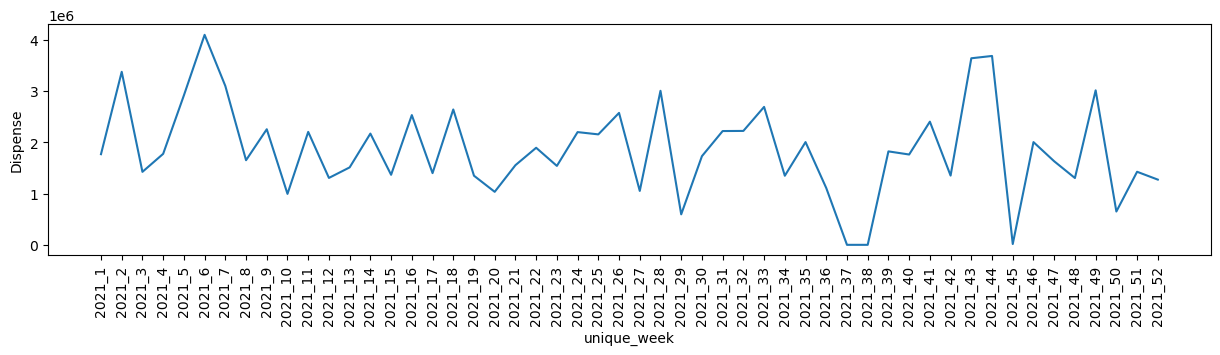

In [7]:
agg_weeklevel_data = df.groupby(['ATMID', 'unique_week', 'year', 'week'])[['Dispense', 'DT', 'CountTotalTxn']].sum().reset_index()
agg_weeklevel_data = agg_weeklevel_data.merge(max_capacity, on='ATMID')
agg_weeklevel_data['utilization'] = agg_weeklevel_data['Dispense']/agg_weeklevel_data['MaxCapacity']
agg_weeklevel_data.sort_values(by=['ATMID', 'year', 'week'], inplace=True)
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
sns.lineplot(data=agg_weeklevel_data[agg_weeklevel_data['ATMID'] == 'APAN11109'].head(52), x='unique_week', y='Dispense')
agg_weeklevel_data.head(52)

In [8]:
agg_weeklevel_data.groupby('ATMID')['Dispense'].describe().reset_index()

,ATMID,count,mean,std,min,25%,50%,75%,max
0,APAN11109,112.0,2.086500e+06,8.603127e+05,0.0,1549500.0,2083500.0,2598750.0,5723000.0
1,APAN22403,112.0,2.799464e+06,1.300140e+06,0.0,1995250.0,2807250.0,3540650.0,6886000.0
2,APAN23217,112.0,3.319217e+06,1.355064e+06,213000.0,2419775.0,3136000.0,4270450.0,8026300.0
3,APAN35706,112.0,6.004929e+05,4.349849e+05,0.0,241350.0,520550.0,857150.0,2197500.0
4,APCN00816,112.0,7.385696e+05,2.346803e+05,202600.0,603350.0,722850.0,903600.0,1359500.0
5,S1CN1142,112.0,1.781239e+06,9.539630e+05,0.0,1123625.0,1675750.0,2382625.0,4556500.0
6,S1CN2011,73.0,1.030273e+06,5.834219e+05,141000.0,608500.0,919500.0,1397000.0,2901700.0
7,S1CN2022,112.0,4.661402e+06,1.715781e+06,587100.0,3457450.0,4552000.0,5804025.0,9030700.0
8,S1CN2820,112.0,2.612273e+06,8.045367e+05,0.0,2078550.0,2555100.0,3252200.0,4553800.0
9,S1CN3514,112.0,3.307799e+06,1.163995e+06,0.0,2626625.0,3294250.0,4111125.0,5723000.0


<Axes: >

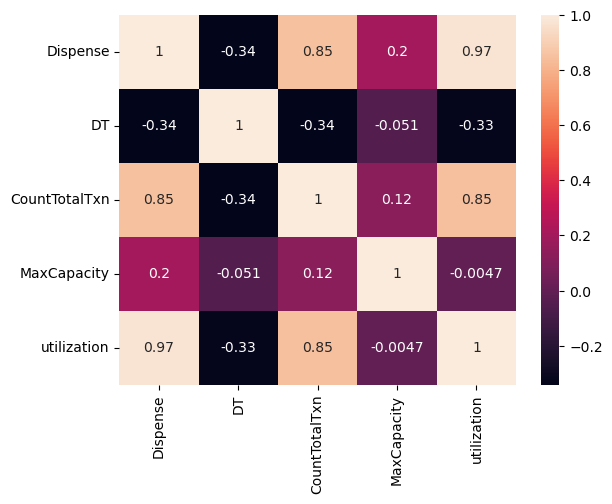

In [10]:
sns.heatmap(agg_weeklevel_data.loc[:, ['Dispense', 'DT', 'CountTotalTxn', 'MaxCapacity', 'utilization']].corr(), annot=True, )